# Importing the dataset and libraries

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!unzip '/content/drive/MyDrive/My Stuff/OCR/train.zip' -d '/content/drive/MyDrive/My Stuff/OCR/samples'

Archive:  /content/drive/MyDrive/My Stuff/OCR/train.zip
replace /content/drive/MyDrive/My Stuff/OCR/samples/train/01360.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.regularizers import *
from PIL import Image
import cv2
import os

# Data Preprocessing

In [34]:
captchaImgShape = (50, 200, 1)
mainPath = '/content/drive/MyDrive/My Stuff/OCR/samples/train/'
numSamples = len(os.listdir(mainPath))
captchaLength = 5
print(captchaImgShape)
print(numSamples)

(50, 200, 1)
1531


In [36]:
# Finding out the characters present in captcha images
# captchaCharacters = ['a':0, 'b':0, 'c':0, 'd':0, 'e':0, 'f':0, 'g':0, 'h':0, 'i':0, 'j':0, 'k':0, 'l':0, 'm':0, 'n':0, 'o':0, 'p':0, 'q':0, 'r':0, 's':0,'x':0, 'w':0, 'y':0, 'z':0, '0':0,'1':0, '2':0, '3':0, '4':0,'5':0,'6':0,'7':0,'8':0,'9':0}
                     
captchaCharacters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's','t','u','v','x', 'w', 'y', 'z',
                     '0','1', '2', '3', '4','5','6','7','8','9',
                     'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S','T','U','V','X', 'W', 'Y', 'Z'
                     ]
numSymbols = len(captchaCharacters)

In [37]:
X = np.zeros((numSamples, 50, 200, 1))
y = np.zeros((captchaLength, numSamples, numSymbols))
for i, img in enumerate(os.listdir(mainPath)):
  captchaImg = cv2.imread(mainPath+img, cv2.IMREAD_GRAYSCALE)
  captchaImg = cv2.resize(captchaImg, (200, 50))
  captchaImg = captchaImg / 255.0
  captchaImg = np.reshape(captchaImg, captchaImgShape)
  X[i] = captchaImg
  currentName = np.zeros((captchaLength, numSymbols))
  captchaName = img.split('.')[0]
  for j, character in enumerate(captchaName):
    currentName[j, captchaCharacters.index(character)] = 1
  y[:, i] = currentName

In [38]:
print(X.shape)
print(y.shape)

(1531, 50, 200, 1)
(5, 1531, 62)


# Creating Testing and Training Data

In [39]:
X_train = X
y_train = y

# Convolutional Neural Network Model

In [40]:
input = Input(shape=captchaImgShape)

conv0 = Conv2D(16, activation='relu', kernel_size=5, strides=1, padding="same")(input)
maxpool0 = MaxPool2D(pool_size=(2, 2), padding='same')(conv0)

conv1 = Conv2D(32, activation='relu', kernel_size=3, strides=1, padding="same")(maxpool0)
maxpool1 = MaxPool2D(pool_size=(2, 2), padding='same')(conv1)

conv2 = Conv2D(64, activation='relu', kernel_size=3, strides=1, padding="same")(maxpool1)
maxpool2 = MaxPool2D(pool_size=(2, 2), padding='same')(conv2)

conv3 = Conv2D(128, activation='relu', kernel_size=3, strides=1, padding="same")(maxpool2)
maxpool3 = MaxPool2D(pool_size=(2, 2), padding='same')(conv3)

conv4 = Conv2D(256, activation='relu', kernel_size=3, strides=1, padding="same")(maxpool3)
maxpool4 = MaxPool2D(pool_size=(2, 2), padding='same')(conv4)

flat = Flatten()(maxpool4)
dropout = Dropout(0.5)(flat)
batchnorm = BatchNormalization()(dropout)

dense1 = Dense(64, activation='relu')(batchnorm)
dropout1 = Dropout(0.5)(dense1)
batchnorm1 = BatchNormalization()(dropout1)
output1 = Dense(numSymbols , activation='sigmoid' , name='character1')(batchnorm1)

dense2 = Dense(64, activation='relu')(batchnorm)
dropout2 = Dropout(0.5)(dense2)
batchnorm2 = BatchNormalization()(dropout2)
output2 = Dense(numSymbols , activation='sigmoid' , name='character2')(batchnorm2)

dense3 = Dense(64, activation='relu')(batchnorm)
dropout3 = Dropout(0.5)(dense3)
batchnorm3 = BatchNormalization()(dropout3)
output3 = Dense(numSymbols , activation='sigmoid' , name='character3')(batchnorm3)

dense4 = Dense(64, activation='relu')(batchnorm)
dropout4 = Dropout(0.5)(dense4)
batchnorm4 = BatchNormalization()(dropout4)
output4 = Dense(numSymbols , activation='sigmoid' , name='character4')(batchnorm4)

dense5 = Dense(64, activation='relu')(batchnorm)
dropout5 = Dropout(0.5)(dense5)
batchnorm5 = BatchNormalization()(dropout5)
output5 = Dense(numSymbols , activation='sigmoid' , name='character5')(batchnorm5)

output = [output1, output2, output3, output4, output5]

model = Model(inputs=input, outputs=output, name="captcha-recognition-cnn-model")

In [41]:
model.summary()

Model: "captcha-recognition-cnn-model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 50, 200, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_5 (Conv2D)              (None, 50, 200, 16)  416         ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_5 (MaxPooling2D)  (None, 25, 100, 16)  0          ['conv2d_5[0][0]']               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 25, 100, 32)  4640        ['max

In [15]:
#tf.keras.utils.plot_model(model, show_shapes=True)

In [42]:
modelLoss = 'categorical_crossentropy'
modelMetrics= ['accuracy']
modelOptimizer= 'adam'
model.compile(loss=modelLoss, metrics=modelMetrics, optimizer=modelOptimizer)

# Training the Model

In [43]:
history = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], epochs = 500, batch_size = 32, shuffle=True)

Epoch 1/500
48/48 [==============================] - 4s 22ms/step - loss: 21.6761 - character1_loss: 4.3013 - character2_loss: 4.3461 - character3_loss: 4.3758 - character4_loss: 4.3106 - character5_loss: 4.3423 - character1_accuracy: 0.0444 - character2_accuracy: 0.0405 - character3_accuracy: 0.0353 - character4_accuracy: 0.0418 - character5_accuracy: 0.0392
Epoch 2/500
48/48 [==============================] - 1s 16ms/step - loss: 19.1731 - character1_loss: 3.7968 - character2_loss: 3.8247 - character3_loss: 3.8955 - character4_loss: 3.8474 - character5_loss: 3.8087 - character1_accuracy: 0.0797 - character2_accuracy: 0.0908 - character3_accuracy: 0.0843 - character4_accuracy: 0.0843 - character5_accuracy: 0.0954
Epoch 3/500
48/48 [==============================] - 1s 15ms/step - loss: 17.4092 - character1_loss: 3.4206 - character2_loss: 3.5057 - character3_loss: 3.5471 - character4_loss: 3.5208 - character5_loss: 3.4150 - character1_accuracy: 0.1176 - character2_accuracy: 0.1137 - ch

In [44]:
model.save('./captcha.h5', overwrite=True)

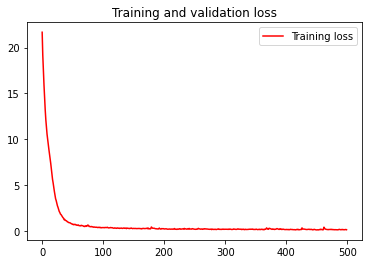

In [45]:
loss = history.history['loss']

epochs = range(len(loss))

plt.plot(epochs, loss, label='Training loss', color='r')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Testing the Model

In [46]:
path = '/content/drive/MyDrive/My Stuff/OCR/test'

In [48]:
characters = captchaCharacters
predictedCaptchaText = []
testCaptchaText = []
index = 0
for captcha in os.listdir(path):
  captcha_path = os.path.join(path, captcha)
  image = cv2.imread(captcha_path, cv2.IMREAD_GRAYSCALE)
  captchaImg = cv2.resize(image, (200, 50))
  captchaImg = captchaImg/255.0
  xt = np.reshape(captchaImg , (1, 50,200,1))
  yp = model.predict(xt)
  yp = np.reshape(yp ,(5, numSymbols))  
  pct = ''.join([characters[np.argmax(i)] for i in yp])
  if pct==captcha[:-4]:
    index = index+1
  else:
    print("predicted:" + pct)
    print(captcha[:-4])
    
print(index)
print((index/len(os.listdir(path)))*100)

1/1 [==============================] - 0s 18ms/step
predicted:cwmng
cwmny
1/1 [==============================] - 0s 15ms/step
predicted:mbb58
mbf58
1/1 [==============================] - 0s 15ms/step
predicted:35864
85864
1/1 [==============================] - 0s 17ms/step
predicted:60517
67587
1/1 [==============================] - 0s 14ms/step
136
97.14285714285714
